In [5]:
import sys
sys.path.append("../lib")
import em2d as zpic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import math
matplotlib.rcParams["figure.figsize"] = (12, 8)

wn = 1.78e14
# tmax = 150*wn/10**15
box = [30.0, 12.0]
dt = 0.01
nx  = [ 500, 200 ]
tmax = 26.7

In [12]:
wn = 1.78e14
# tmax = 150*wn/10**15
box = [30.0, 12.0]
dt = 0.01
nx  = [ 500, 200 ]
tmax = 26.7

sim = zpic.Simulation( nx, box, dt)
laser = zpic.Laser( type = "gaussian", start = 1, a0 = 12.77, omega0 = 10.6, W0 = 1.48, polarization = np.pi/2 , axis=6, 
        rise=14, flat=26.7, fall=14 ,
        # fwhm=1,
        )
sim.add_laser(laser)

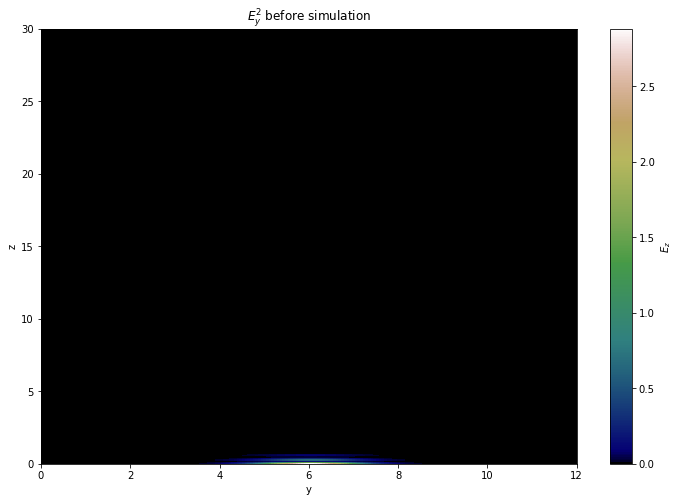

In [13]:
boundary = [[0,sim.box[1]],[0,sim.box[0]]]
plt.imshow( (sim.emf.Ez.T)**2, interpolation = 'nearest', origin = 'lower',
            extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
            aspect = 'auto', cmap = 'gist_earth')
plt.colorbar().set_label('$E_z$')
plt.xlabel("y")
plt.ylabel("z")
plt.title("$E_y^2$ before simulation")
plt.show()

In [14]:
tdump = 100
max_time = math.ceil(tmax/(dt*tdump))
ezs = np.zeros((max_time, nx[1], nx[0]))
eys = np.zeros((max_time, nx[1], nx[0]))
exs = np.zeros((max_time, nx[1], nx[0]))
times = ["1.00", "5.87", "8.40", "11.75", "17.80", "23.67"]
ezs_time = np.zeros((len(times), nx[1], nx[0]))

j = 0
for t in range(int(tmax/dt)):
    print(f"t = {t*dt:.2f} of {tmax}", end = "\r")
    sim.iter()
    if t % tdump == 0:
        ezs[t//tdump,:,:] = sim.emf.Ez
        eys[t//tdump,:,:] = sim.emf.Ey
        exs[t//tdump,:,:] = sim.emf.Ex
    if f"{t*dt:.2f}" in times:
        ezs_time[j,:,:] = sim.emf.Ez
        j += 1

time_new = np.linspace(0, tmax, max_time)/wn*1e15
time_new

array([  0.        ,   5.76923077,  11.53846154,  17.30769231,
        23.07692308,  28.84615385,  34.61538462,  40.38461538,
        46.15384615,  51.92307692,  57.69230769,  63.46153846,
        69.23076923,  75.        ,  80.76923077,  86.53846154,
        92.30769231,  98.07692308, 103.84615385, 109.61538462,
       115.38461538, 121.15384615, 126.92307692, 132.69230769,
       138.46153846, 144.23076923, 150.        ])

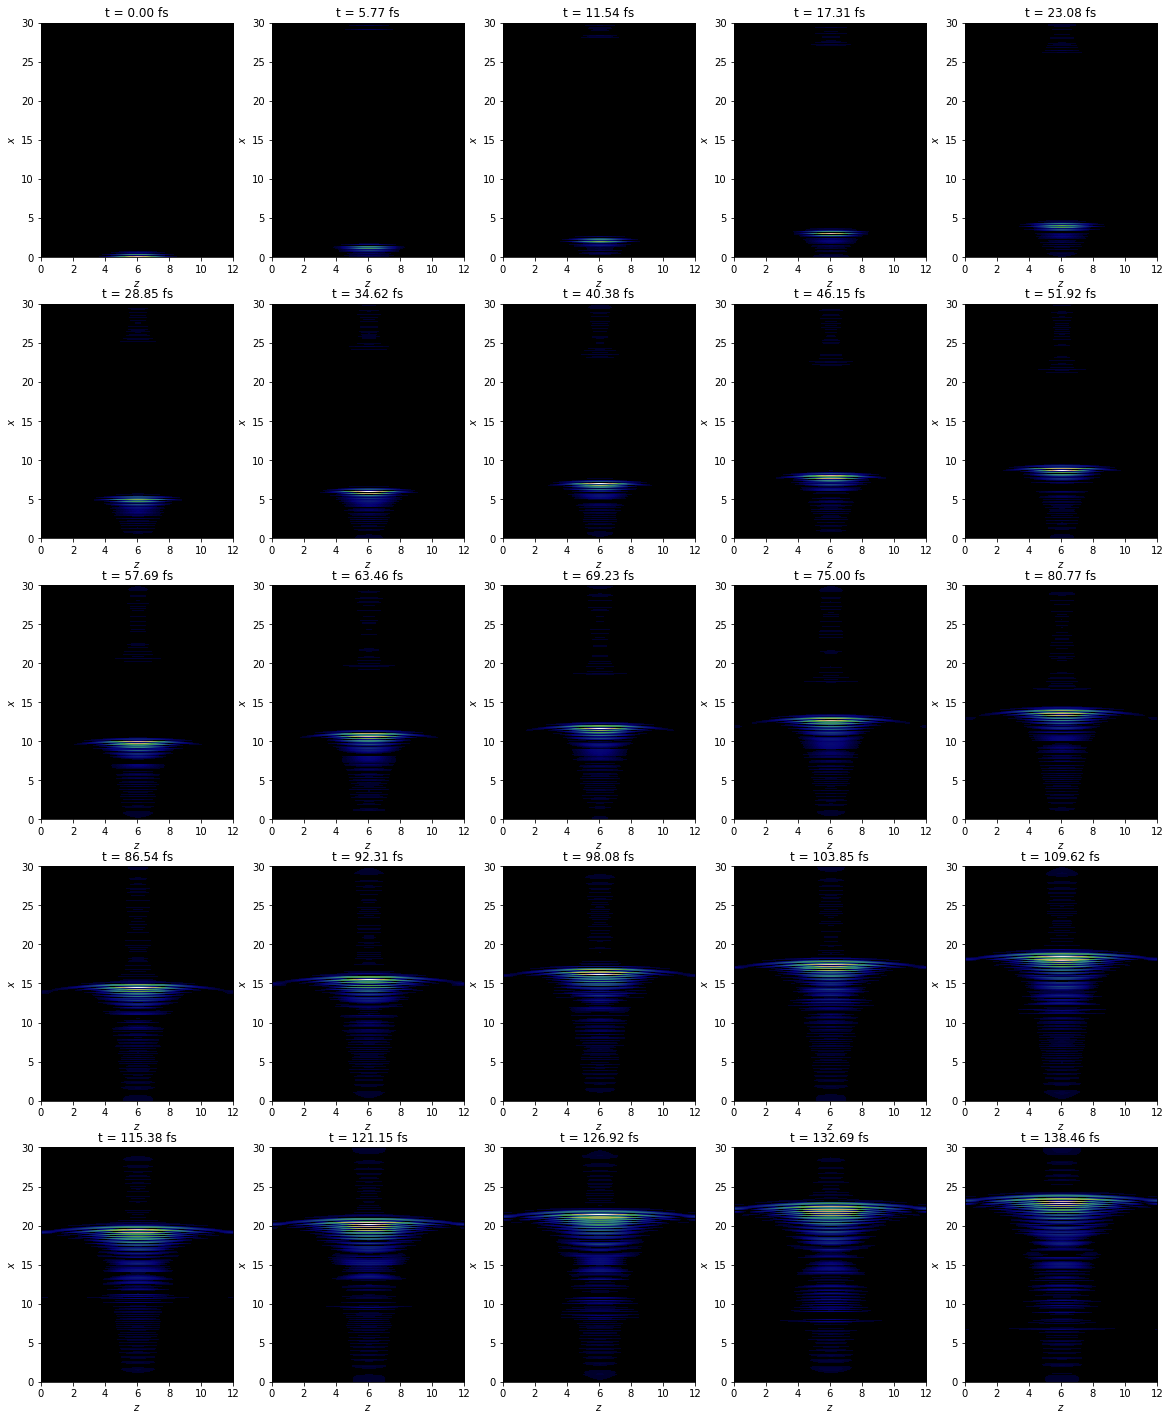

In [15]:
fig, axs = plt.subplots(5,5)
fig.set_size_inches(20,25)

for i in range(25):
    row = i//5
    col = i%5
    ax = axs[row,col]
    im =ax.imshow( ezs[i].T**2, interpolation = 'nearest', origin = 'lower',
            extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
            aspect = 'auto', cmap = 'gist_earth',
        #     norm=colors.Normalize(vmin=0.0, vmax=0.05)
            )
    ax.set_xlabel("$z$")
    ax.set_ylabel("$x$")
    ax.set_title(f"t = {time_new[i]:.2f} fs")


In [10]:
def plot_all(rise, flat, fall):
    sim = zpic.Simulation( nx, box, dt)
    laser = zpic.Laser( type = "gaussian", start = 1, a0 = 12.77, omega0 = 1, W0 = 1.48, polarization = np.pi/2 , axis=6, 
            rise=rise, flat=flat, fall=fall ,
            # fwhm=1,
            )
    boundary = [[0,sim.box[1]],[0,sim.box[0]]]
    sim.add_laser(laser)

    tdump = 100
    max_time = math.ceil(tmax/(dt*tdump))
    ezs = np.zeros((max_time, nx[1], nx[0]))
    eys = np.zeros((max_time, nx[1], nx[0]))
    exs = np.zeros((max_time, nx[1], nx[0]))
    times = ["1.00", "5.87", "8.40", "11.75", "17.80", "23.67"]
    ezs_time = np.zeros((len(times), nx[1], nx[0]))

    j = 0
    for t in range(int(tmax/dt)):
        print(f"t = {t*dt:.2f} of {tmax}", end = "\r")
        sim.iter()
        if t % tdump == 0:
            ezs[t//tdump,:,:] = sim.emf.Ez
            eys[t//tdump,:,:] = sim.emf.Ey
            exs[t//tdump,:,:] = sim.emf.Ex
        if f"{t*dt:.2f}" in times:
            ezs_time[j,:,:] = sim.emf.Ez
            j += 1

    time_new = np.linspace(0, tmax, max_time)/wn*1e15

    fig, axs = plt.subplots(5,5)
    fig.set_size_inches(20,25)

    for i in range(25):
        row = i//5
        col = i%5
        ax = axs[row,col]
        im =ax.imshow( ezs[i].T**2, interpolation = 'nearest', origin = 'lower',
                extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
                aspect = 'auto', cmap = 'gist_earth',
                norm=colors.Normalize(vmin=0.0, vmax=0.05)
                )
        ax.set_xlabel("$z$")
        ax.set_ylabel("$x$")
        ax.set_title(f"t = {time_new[i]:.2f} fs")
    # fig.savefig(f"beam/{rise}_{flat}_{fall}.png")
    # plt.close()


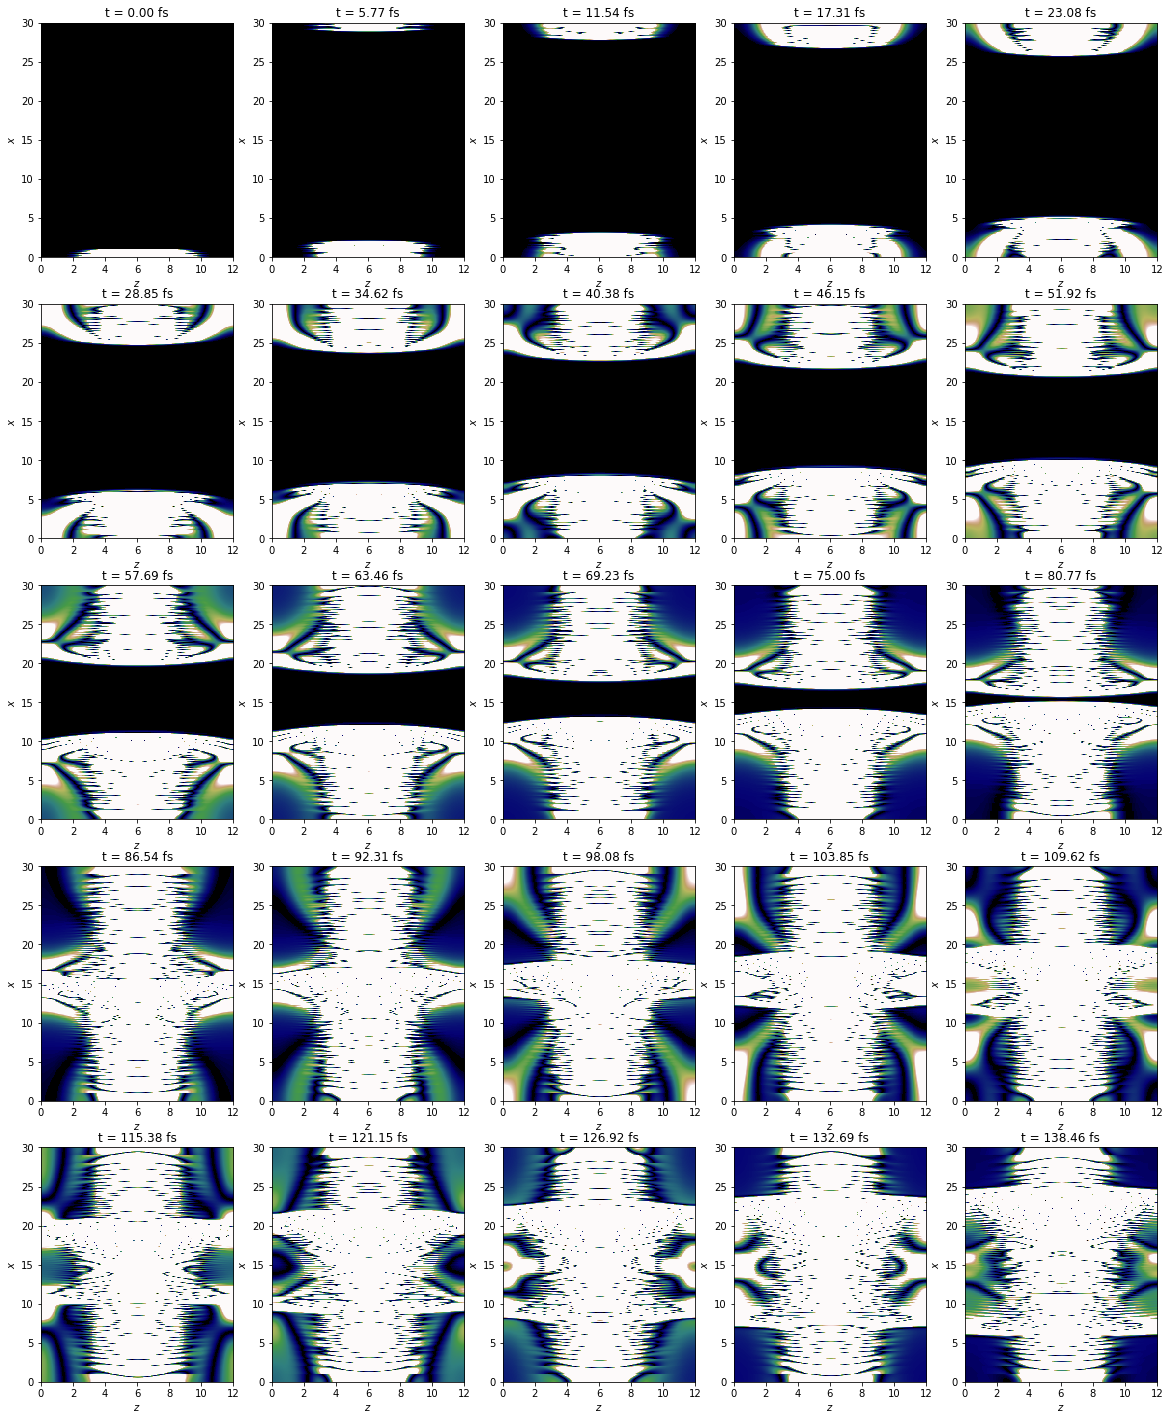

In [11]:
plot_all(1,1,1)

In [14]:
# import tqdm

In [15]:
# all = list(range(1, 26))
# for i in tqdm.tqdm(all, desc="Beam"):
#     for j in all:
#         for k in all:
#             plot_all(i+1,j+1,k+1)